# Scikit Learn workflow introduction:

In [58]:
import numpy as np
import pandas as pd
import sklearn

heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [59]:
# Create X -> features matrix
X = heart_disease.drop("target", axis=1)

# Create y -> labels
y = heart_disease["target"]

In [60]:
from sklearn.ensemble import RandomForestClassifier

# Choose right model and hyperparameters
clf = RandomForestClassifier(n_estimators=100)

# Keeping default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [61]:
# Fit model to training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [62]:
clf.fit(X_train, y_train);

In [63]:
# Make a prediction
y_preds = clf.predict(X_test)
y_preds

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0])

In [64]:
y_test

42     1
291    0
15     1
51     1
265    0
      ..
18     1
247    0
126    1
131    1
176    0
Name: target, Length: 61, dtype: int64

In [65]:
# Evaluate the model on the training and test data
clf.score(X_train, y_train)

1.0

In [66]:
clf.score(X_test, y_test)

0.7704918032786885

In [67]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

classification_report(y_test, y_preds)

'              precision    recall  f1-score   support\n\n           0       0.63      0.81      0.71        21\n           1       0.88      0.75      0.81        40\n\n    accuracy                           0.77        61\n   macro avg       0.76      0.78      0.76        61\nweighted avg       0.80      0.77      0.78        61\n'

In [68]:
confusion_matrix(y_test, y_preds)

array([[17,  4],
       [10, 30]])

In [69]:
accuracy_score(y_test, y_preds)

0.7704918032786885

In [70]:
# Improve model
# Try different amount of n_estimators
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators.")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test)*100}")

Trying model with 10 estimators.
Model accuracy on test set: 80.32786885245902
Trying model with 20 estimators.
Model accuracy on test set: 80.32786885245902
Trying model with 30 estimators.
Model accuracy on test set: 78.68852459016394
Trying model with 40 estimators.
Model accuracy on test set: 78.68852459016394
Trying model with 50 estimators.
Model accuracy on test set: 77.04918032786885
Trying model with 60 estimators.
Model accuracy on test set: 77.04918032786885
Trying model with 70 estimators.
Model accuracy on test set: 80.32786885245902
Trying model with 80 estimators.
Model accuracy on test set: 81.9672131147541
Trying model with 90 estimators.
Model accuracy on test set: 80.32786885245902


In [71]:
# Save model
import pickle

pickle.dump(clf, open("random_forest_model.pkl", "wb"))

In [72]:
# Load model
loaded_model = pickle.load(open("random_forest_model.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.8032786885245902

# 1. Getting the data ready

In [73]:
# Three main things we have to do:
# 1. split data into features and labels (usually X and y)
# 2. fill or removing missing values
# 3. convert non-numerical values to numerical values (usually done with encoding)

In [74]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [75]:
X = heart_disease.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [76]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [77]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [78]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [79]:
# Converting data to numbers
car_sales = pd.read_csv("data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [80]:
len(car_sales)

1000

In [81]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [82]:
# Split data into X/y
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [83]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor

# Will not work because we need to convert values to numbers
model = RandomForestRegressor()
# model.fit(X_train, y_train)
# model.score(X_test, y_test)

In [84]:
# Turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [85]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [86]:
# Another way for converting data to numbers
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [87]:
# Refitting the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)
model.fit(X_train, y_train)

RandomForestRegressor()

In [88]:
model.score(X_test, y_test)

0.3235867221569877

In [89]:
# In a newer version of Scikit-Learn (0.23+), the OneHotEncoder class was upgraded to be able to handle None & NaN values.
print(sklearn.__version__)

1.5.1


In [90]:
# Dealing with missing values in data
# 1. Fill them with some value (imputation)
# 2. Remove the samples with missing data altogether

In [91]:
car_sales_extended_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_extended_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [92]:
# Checking missing values
car_sales_extended_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [93]:
# Create X & y
X = car_sales_extended_missing.drop("Price", axis=1)
y = car_sales_extended_missing["Price"]

In [94]:
# Turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [95]:
car_sales_extended_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [96]:
# Option 1 : Filling missing data with pandas

# Older method of doing inplace
# car_sales_extended_missing["Make"].fillna("missing", inplace=True)
# car_sales_extended_missing["Colour"].fillna("missing", inplace=True)
# car_sales_extended_missing["Doors"].fillna(4, inplace=True)
# car_sales_extended_missing["Odometer (KM)"].fillna(car_sales_extended_missing["Odometer (KM)"].mean(), inplace=True)

# Newer method of doing inplace
car_sales_extended_missing.fillna({"Make": "missing"}, inplace=True)
car_sales_extended_missing.fillna({"Colour": "missing"}, inplace=True)
car_sales_extended_missing.fillna({"Doors": 4}, inplace=True)
car_sales_extended_missing.fillna({"Odometer (KM)": car_sales_extended_missing["Odometer (KM)"].mean()}, inplace=True)

In [97]:
# Rechecking missing values after filling them
car_sales_extended_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [98]:
# Remove rows with missing price values
car_sales_extended_missing.dropna(inplace=True)

In [99]:
car_sales_extended_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [100]:
len(car_sales_extended_missing)

950

In [101]:
# Create X & y
X = car_sales_extended_missing.drop("Price", axis=1)
y = car_sales_extended_missing["Price"]

# Turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_extended_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [102]:
# Option 2 : Filling missing values with Scikit-Learn

# Import data from csv file
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")

# Drop rows with no price value
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

# Split into X and y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

# Split data into train and test sets
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create imputers
from sklearn.impute import SimpleImputer
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define different column features
categorical_features = ["Make", "Colour"]
door_feature = ["Doors"]
numerical_feature = ["Odometer (KM)"]

# Create series of column transforms to perform
from sklearn.compose import ColumnTransformer
imputer = ColumnTransformer([
        ("cat_imputer", cat_imputer, categorical_features),
        ("door_imputer", door_imputer, door_feature),
        ("num_imputer", num_imputer, numerical_feature)
    ])

# Find values to fill and transform training data
filled_X_train = imputer.fit_transform(X_train)
# Fill values in to the test set with values learned from the training set
filled_X_test = imputer.transform(X_test)

# Get our transformed data array's back into DataFrame's
filled_X_train_df = pd.DataFrame(filled_X_train, columns=["Make", "Colour", "Doors", "Odometer (KM)"])
filled_X_test_df = pd.DataFrame(filled_X_test, columns=["Make", "Colour", "Doors", "Odometer (KM)"])

# Check missing data in training set
filled_X_train_df.isna().sum()

# Hot encode the features
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough", sparse_threshold=0)

# Fill train and test values separately
transformed_X_train = transformer.fit_transform(filled_X_train_df)
transformed_X_test = transformer.transform(filled_X_test_df)

# Fitting model
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
model = RandomForestRegressor()
model.fit(transformed_X_train, y_train)
model.score(transformed_X_test, y_test)

0.21229043336119102

# 2. Choosing the right estimator/algorithm for your problem

In [103]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [104]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [105]:
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [106]:
# Import algorithm/estimator
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit model
model = Ridge()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.5758549611440126

In [107]:
# Trying a different model
from sklearn.linear_model import Lasso
np.random.seed(42)
model = Lasso()
model.fit(X_train, y_train)
model.score(X_test, y_test)
# Result: performed worse

0.28416718210084113

In [108]:
# Trying a different model
from sklearn.linear_model import ElasticNet
np.random.seed(42)
model = ElasticNet()
model.fit(X_train, y_train)
model.score(X_test, y_test)
# Result: performed worse

0.416551890980282

In [109]:
# Trying RandomForestRegressor from ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit model
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8059809073051385

In [110]:
# Trying classification models
# SVC

# Read csv data
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

# Set seed
np.random.seed(42)

# Split data in X/y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Import model/estimator
from sklearn import svm
model = svm.SVC()

# Fit model
model.fit(X_train, y_train)

# Test model
model.score(X_test, y_test)

0.7049180327868853

In [111]:
# Trying classification models
# LinearSVC

# Read csv data
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

# Set seed
np.random.seed(42)

# Split data in X/y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Import model/estimator
from sklearn.svm import LinearSVC
model = LinearSVC()

# Fit model
model.fit(X_train, y_train)

# Test model
model.score(X_test, y_test)

0.8688524590163934

In [112]:
# Trying RandomForestClassifier classification model

# Read csv data
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

# Set seed
np.random.seed(42)

# Split data in X/y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Import model/estimator
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

# Fit model
model.fit(X_train, y_train)

# Evaluate model
model.score(X_test, y_test)

0.8524590163934426

# 3. Fit the model to data and using it to make predictions

In [113]:
# 3.1 Fitting the model

In [114]:
# RandomForestClassifier classification model

# Read csv data
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

# Set seed
np.random.seed(42)

# Split data in X/y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Import model/estimator
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

# Fit model
model.fit(X_train, y_train)

# Evaluate model
model.score(X_test, y_test)

0.8524590163934426

In [115]:
# 3.2 Making predictions

In [116]:
# Predicting target values with predict()
model.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [117]:
# Original target values
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [118]:
# Compare predictions to truth(y)
y_preds = model.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [119]:
model.score(X_test, y_test)

0.8524590163934426

In [120]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

In [121]:
# Predicting target values with predict_proba()

# It returns probabilities of a classification label

model.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [122]:
# Predicting target values on RandomForestRegressor model from ensemble module

from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model instance
model = RandomForestRegressor()

# Fit model
model.fit(X_train, y_train)
# model.score(X_test, y_test)

# Predicting target values
y_preds = model.predict(X_test)

In [123]:
y_preds[:10]

array([0.49058  , 0.75989  , 4.9350165, 2.55864  , 2.33461  , 1.6580801,
       2.34237  , 1.66708  , 2.5609601, 4.8519781])

In [124]:
np.array(y_test)

array([0.477  , 0.458  , 5.00001, ..., 5.00001, 0.723  , 1.515  ])

In [125]:
# Comparing predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.3270458119670544

# 4. Evaluating a model

In [126]:
# Scikit-Learn implements 3 different methods of evaluating models.

# 1. The score() method. Calling score() on a model instance will return a metric assosciated with the type of model you're using. The metric depends on which model you're using.
# 2. The scoring parameter. This parameter can be passed to methods such as cross_val_score() or GridSearchCV() to tell Scikit-Learn to use a specific type of scoring metric
# 3. Problem-specific metric functions available in sklearn.metrics. Similar to how the scoring parameter can be passed different scoring functions, Scikit-Learn implements these as stand alone functions.

# The scoring function you use will also depend on the problem you're working on.
# Classification problems have different evaluation metrics and scoring functions to regression problems.

### 4.1 Evaluating predictions →

In [128]:
# Evaluating model with score method

# Import model/estimator
from sklearn.ensemble import RandomForestClassifier

# Set seed
np.random.seed()

# Import data and create X and y
heart_disease = pd.read_csv("data/heart-disease.csv")
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model instance
model = RandomForestClassifier()

# Fit model
model.fit(X_train, y_train)

# Evaluating the model
model.score(X_test, y_test)

0.8360655737704918

In [129]:
# RandomForestClassifier classification model

# Read csv data
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

# Set seed
np.random.seed(42)

# Split data in X/y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Import model/estimator
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)

# Fit model
model.fit(X_train, y_train)

# Evaluate model
model.score(X_test, y_test)

0.8524590163934426

In [130]:
# Evaluating model using scoring parameter

from sklearn.model_selection import cross_val_score

# Set seed
np.random.seed()

# Import data and create X and y
heart_disease = pd.read_csv("data/heart-disease.csv")
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model instance and fitting the model
model = RandomForestClassifier().fit(X_train, y_train)

# Evaluating the model
model.score(X_test, y_test)

0.7868852459016393

In [131]:
cross_val_score(model, X, y, cv=5)

array([0.83606557, 0.86885246, 0.80327869, 0.8       , 0.75      ])

In [132]:
np.random.seed(42)

# Single training and test split score
model_single_score = model.score(X_test, y_test)

# Mean of 5-fold cross-validation score
model_cross_val_score = np.mean(cross_val_score(model, X, y, cv=5))

model_single_score, model_cross_val_score

# Default scoring parameter of classifier is equal to the mean accuracy
# model_cross_val_score1 = cross_val_score(model, X, y, cv=5)
# model_cross_val_score2 = cross_val_score(model, X, y, cv=5, scoring=None)
# model_cross_val_score1, model_cross_val_score2

(0.7868852459016393, 0.8248087431693989)

### 4.2 Classification model evaluation metrics →
#### 1. Accuracy
#### 2. Area under ROC curve
#### 3. Confusion matrix
#### 4. Classification report

In [134]:
# 1. Accuracy

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y, cv=5)
np.mean(cross_val_score)

0.8248087431693989

In [135]:
print(f"Heart disease classifier cross-validated accuracy: {np.mean(cross_val_score)*100:.2f}%")

Heart disease classifier cross-validated accuracy: 82.48%


In [137]:
# 2. AUC/ROC

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit the classifier
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)
y_probs[:10]

array([[0.69, 0.31],
       [0.58, 0.42],
       [0.92, 0.08],
       [0.08, 0.92],
       [0.07, 0.93],
       [0.03, 0.97],
       [0.28, 0.72],
       [0.9 , 0.1 ],
       [0.39, 0.61],
       [0.11, 0.89]])

In [139]:
y_probs_positive = y_probs[:,1]
y_probs_positive

array([0.31, 0.42, 0.08, 0.92, 0.93, 0.97, 0.72, 0.1 , 0.61, 0.89, 0.93,
       0.14, 0.99, 0.57, 0.48, 1.  , 0.35, 0.03, 0.3 , 0.74, 0.89, 0.39,
       0.83, 0.07, 0.33, 0.  , 0.32, 0.07, 0.99, 0.97, 0.69, 0.14, 0.7 ,
       0.8 , 0.78, 0.58, 0.47, 0.16, 0.22, 0.88, 0.88, 0.19, 0.47, 0.14,
       0.5 , 0.86, 0.01, 0.48, 0.59, 0.63, 0.03, 0.41, 0.9 , 0.87, 0.93,
       0.84, 0.11, 0.56, 0.17, 0.18, 0.94])

In [140]:
from sklearn.metrics import roc_curve

# Calculate fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.03703704, 0.03703704,
       0.07407407, 0.07407407, 0.11111111, 0.11111111, 0.14814815,
       0.14814815, 0.22222222, 0.2962963 , 0.2962963 , 0.33333333,
       0.33333333, 0.48148148, 0.48148148, 0.59259259, 0.7037037 ,
       0.81481481, 0.85185185, 0.92592593, 1.        ])

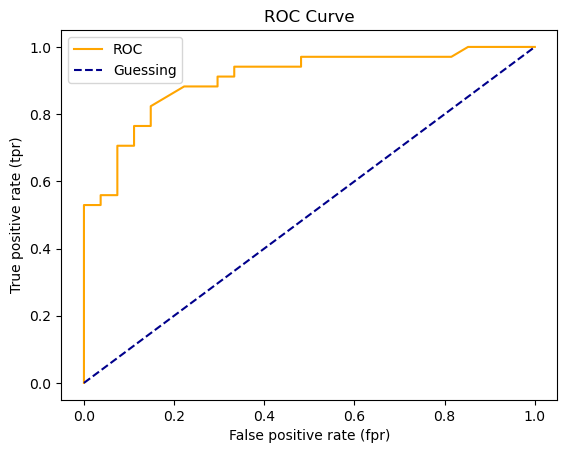

In [144]:
# Create a function for plotting ROC curves

import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positve rate (fpr) and 
    true postive rate (tpr) of a classifier.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="Guessing")
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [146]:
# ROC AUC scors
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs_positive)

0.9046840958605664

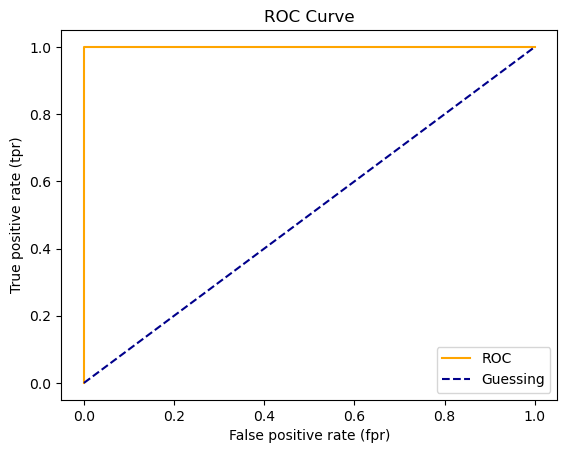

In [145]:
# Plot perfect ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [147]:
# 3. Confusion matrix

from sklearn.metrics import confusion_matrix
y_preds = clf.predict(X_test)
confusion_matrix(y_test, y_preds)

array([[23,  4],
       [ 7, 27]])

In [149]:
# Visualize confusion matrix with pc.crosstab()
pd.crosstab(y_test, y_preds, rownames=["Actual Labels"], colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,23,4
1,7,27


In [150]:
23+7+4+27

61

In [151]:
len(X_test)

61

In [152]:
# Install conda package seaborn in our current environment from jupyter notebook
import sys
%conda install --yes --prefix {sys.prefix} seaborn

Channels:
 - defaults
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /Users/aakashdwivedy/Desktop/dev/ai_ml/sample_ai_project/env

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    seaborn-0.13.2             |  py312hca03da5_0         714 KB
    ------------------------------------------------------------
                                           Total:         714 KB

The following NEW packages will be INSTALLED:

  seaborn            pkgs/main/osx-arm64::seaborn-0.13.2-py312hca03da5_0 



                                                                                
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


<Axes: >

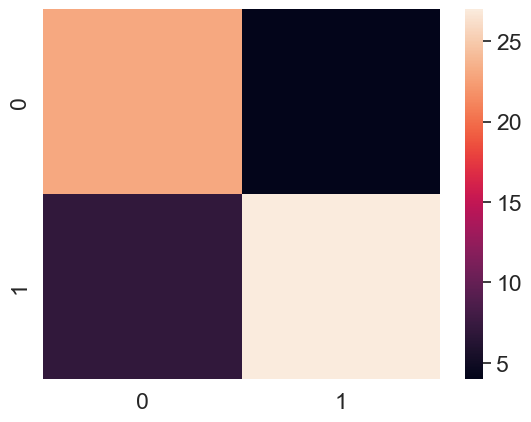

In [154]:
# Make our confusion matrix more visual with Seaborn's heatmap()
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using seaborn
sns.heatmap(conf_mat)

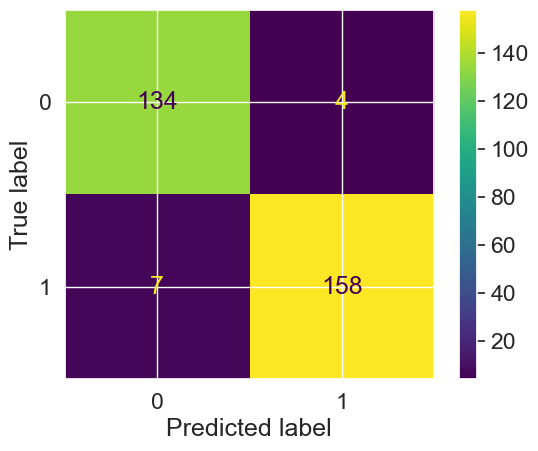

In [156]:
# 3. Confusion matrix (new methods)
# Using new methods of creating a confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf, X, y)

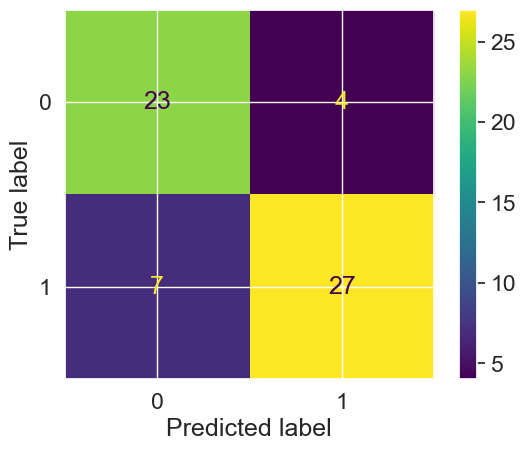

In [157]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds)

In [158]:
# 4. Classification report

from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81        27
           1       0.87      0.79      0.83        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



### 4.3 Regression model evaluation metrics →
#### 1. R^2 (pronounced r-squared) or coefficient of determination
#### 2. Mean absolute error (MAE)
#### 3. Mean squared error (MSE)

In [167]:
# 1. R^2 Score (coefficient of determination)

from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
X = housing_df.drop("target", axis=1)
y = housing_df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Calculate the models R^2 score
model.score(X_test, y_test)

0.8059809073051385

In [170]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

# Outside of the score() function, R^2 can be calculated using Scikit-Learn's r2_score() function.
# A model which only predicted the mean would get a score of 0.
r2_score(y_test, y_test_mean)

# And a perfect model would get a score of 1.
r2_score(y_test, y_test)

1.0

In [173]:
# 2. Mean Absolute Error (MAE)

from sklearn.metrics import mean_absolute_error
y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.3270458119670544

In [175]:
df = pd.DataFrame(data={"Actual values": y_test, "Predicted values": y_preds})
df["differences"] = df["Predicted values"] - df["Actual values"]
df.head()

,Actual values,Predicted values,differences
20046,0.47700,0.490580,0.013580
3024,0.45800,0.759890,0.301890
15663,5.00001,4.935016,-0.064994
20484,2.18600,2.558640,0.372640
9814,2.78000,2.334610,-0.445390


In [177]:
# MAE using formulas and differences
np.abs(df["differences"]).mean()

0.3270458119670544

In [178]:
# 3. Mean squared error (MSE)

from sklearn.metrics import mean_squared_error
y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.2542443610174998

In [180]:
df["squared differences"] = np.square(df["differences"])
df.head()

,Actual values,Predicted values,differences,squared differences
20046,0.47700,0.490580,0.013580,0.000184
3024,0.45800,0.759890,0.301890,0.091138
15663,5.00001,4.935016,-0.064994,0.004224
20484,2.18600,2.558640,0.372640,0.138861
9814,2.78000,2.334610,-0.445390,0.198372


In [182]:
# Calculate by hand
squared = np.square(df["differences"]).mean()
squared

0.2542443610174998

### 4.4 Evaluating with scoring parameter →

In [191]:
# Using scoring parameter on classification problems

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]
clf = RandomForestClassifier()

# Cross-validated accuracy
# If scoring=None, estimator's default scoring evaluation metric is used, which is accuracy for classification models
cv_acc = cross_val_score(clf, X, y, cv=5, scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [195]:
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [194]:
# Cross-validated precision
np.random.seed(42)
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [196]:
print(f"The cross-validated precision is: {np.mean(cv_precision)}")

The cross-validated precision is: 0.8329547346025924


In [197]:
# Cross-validated recall
np.random.seed(42)
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [198]:
print(f"The cross-validated recall is: {np.mean(cv_recall)}")

The cross-validated recall is: 0.8545454545454545


In [205]:
# Using scoring parameter on regression problems

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
X = housing_df.drop("target", axis=1)
y = housing_df["target"]
model = RandomForestRegressor()

# Cross-validated r2
cv_r2 = cross_val_score(model, X, y, cv=5, scoring=None)
cv_r2

array([0.51648146, 0.70255896, 0.74089371, 0.61492293, 0.68335489])

In [206]:
np.mean(cv_r2)

0.6516423891480653

In [208]:
# Cross-validated mean squared error
cv_mse = cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error")
cv_mse

array([-0.51750358, -0.35063286, -0.37386763, -0.44685782, -0.46678928])

In [209]:
np.mean(cv_mse)

-0.4311302337214557

In [210]:
# Cross-validated mean absolute error
cv_mae = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
cv_mae

array([-0.54579905, -0.40576483, -0.43496067, -0.46379509, -0.47408489])

In [211]:
np.mean(cv_mae)

-0.4648809080426357

### 4.5 Evaluating with metric functions →

In [235]:
# Evaluating classification models

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Set seed
np.random.seed(42)

# Create X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
clf = RandomForestClassifier()

# Fit model
clf.fit(X_train, y_train)

# Make prediction
y_preds = clf.predict(X_test)

# Evaluating model using evaluation metric functions
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Accuracy: {precision_score(y_test, y_preds)}")
print(f"Accuracy: {recall_score(y_test, y_preds)}")
print(f"Accuracy: {f1_score(y_test, y_preds)}")

Accuracy: 85.25%
Accuracy: 0.8484848484848485
Accuracy: 0.875
Accuracy: 0.8615384615384616


In [242]:
# Evaluating regression models

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Set seed
np.random.seed(42)

# Create X & y
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
model = RandomForestRegressor()

# Fit model
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

# Evaluating model using evaluation metric functions
print(f"Accuracy: {r2_score(y_test, y_preds)}")
print(f"MEA - mean absolute error: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE - mean squared error: {mean_squared_error(y_test, y_preds)}")

Accuracy: 0.8059809073051385
MEA - mean absolute error: 0.3270458119670544
MSE - mean squared error: 0.2542443610174998


# 5. Improving the model

In [244]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyperparameters by hand

In [246]:
# Making a function for evaluation
def evaluate_preds(y_true: np.array, 
                   y_preds: np.array) -> dict:
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.

    Returns several metrics in the form of a dictionary.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict

In [ ]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffling data
heart_disease_shuffled = heart_disease.sample()